<a href="https://colab.research.google.com/github/Dicti93/MLSEM/blob/master/Marcel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
pip install ucimlrepo

In [53]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn imports for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.svm import SVC

# tensorflow for nn
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GaussianNoise
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Specific library import for fetching datasets
from ucimlrepo import fetch_ucirepo

In [54]:
# Adjust the display settings to increase the width
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.expand_frame_repr', False)  # Do not wrap DataFrame horizontally
pd.set_option('display.width', 240)  # Set the maximum width of the display

In [55]:
# fetch dataset
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938)

# data (as pandas dataframes)
features = regensburg_pediatric_appendicitis.data.features
targets = regensburg_pediatric_appendicitis.data.targets

# metadata
print(regensburg_pediatric_appendicitis.metadata)

# variable information
print(regensburg_pediatric_appendicitis.variables)

{'uci_id': 938, 'name': 'Regensburg Pediatric Appendicitis', 'repository_url': 'https://archive.ics.uci.edu/dataset/938/regensburg+pediatric+appendicitis', 'data_url': 'https://archive.ics.uci.edu/static/public/938/data.csv', 'abstract': 'This repository holds the data from a cohort of pediatric patients with suspected appendicitis admitted with abdominal pain to Children’s Hospital St. Hedwig in Regensburg, Germany, between 2016 and 2021. Each patient has (potentially multiple) ultrasound (US) images, aka views, tabular data comprising laboratory, physical examination, scoring results and ultrasonographic findings extracted manually by the experts, and three target variables, namely, diagnosis, management and severity.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Image'], 'num_instances': 782, 'num_features': 53, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': ['Age', 'Sex'], 'target_col': ['Management', 'Severity',

In [56]:
# Print the basic info of the features DataFrame
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Alvarado_Score                    730 non-null    float64
 7   Paedriatic_Appendicitis_Score     730 non-null    float64
 8   Appendix_on_US                    777 non-null    object 
 9   Appendix_Diameter                 498 non-null    float64
 10  Migratory_Pain                    773 non-null    object 
 11  Lower_Right_Abd_Pain              774 non-null    object 
 12  Contrala

In [57]:
# Print the basic info of the targets DataFrame
targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Management  781 non-null    object
 1   Severity    781 non-null    object
 2   Diagnosis   780 non-null    object
dtypes: object(3)
memory usage: 18.5+ KB


In [58]:
# Display the first 5 rows of the features DataFrame
print(features.head())

     Age   BMI     Sex  Height  Weight  Length_of_Stay  Alvarado_Score  Paedriatic_Appendicitis_Score Appendix_on_US  Appendix_Diameter Migratory_Pain Lower_Right_Abd_Pain Contralateral_Rebound_Tenderness Coughing_Pain Nausea Loss_of_Appetite  Body_Temperature  WBC_Count  Neutrophil_Percentage  Segmented_Neutrophils Neutrophilia  RBC_Count  Hemoglobin   RDW  Thrombocyte_Count Ketones_in_Urine RBC_in_Urine WBC_in_Urine  CRP Dysuria         Stool Peritonitis Psoas_Sign Ipsilateral_Rebound_Tenderness US_Performed Free_Fluids Appendix_Wall_Layers Target_Sign Appendicolith Perfusion Perforation Surrounding_Tissue_Reaction Appendicular_Abscess Abscess_Location Pathological_Lymph_Nodes Lymph_Nodes_Location Bowel_Wall_Thickening Conglomerate_of_Bowel_Loops Ileus Coprostasis Meteorism Enteritis Gynecological_Findings
0  12.68  16.9  female   148.0    37.0             3.0             4.0                            3.0            yes                7.1             no                  yes         

In [59]:
# Display the first 5 rows of the targets DataFrame
print(targets.head())

     Management       Severity        Diagnosis
0  conservative  uncomplicated     appendicitis
1  conservative  uncomplicated  no appendicitis
2  conservative  uncomplicated  no appendicitis
3  conservative  uncomplicated  no appendicitis
4  conservative  uncomplicated     appendicitis


In [60]:
# Print all feature names
print(features.columns)

Index(['Age', 'BMI', 'Sex', 'Height', 'Weight', 'Length_of_Stay', 'Alvarado_Score', 'Paedriatic_Appendicitis_Score', 'Appendix_on_US', 'Appendix_Diameter', 'Migratory_Pain', 'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness',
       'Coughing_Pain', 'Nausea', 'Loss_of_Appetite', 'Body_Temperature', 'WBC_Count', 'Neutrophil_Percentage', 'Segmented_Neutrophils', 'Neutrophilia', 'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count', 'Ketones_in_Urine',
       'RBC_in_Urine', 'WBC_in_Urine', 'CRP', 'Dysuria', 'Stool', 'Peritonitis', 'Psoas_Sign', 'Ipsilateral_Rebound_Tenderness', 'US_Performed', 'Free_Fluids', 'Appendix_Wall_Layers', 'Target_Sign', 'Appendicolith', 'Perfusion',
       'Perforation', 'Surrounding_Tissue_Reaction', 'Appendicular_Abscess', 'Abscess_Location', 'Pathological_Lymph_Nodes', 'Lymph_Nodes_Location', 'Bowel_Wall_Thickening', 'Conglomerate_of_Bowel_Loops', 'Ileus', 'Coprostasis',
       'Meteorism', 'Enteritis', 'Gynecological_Findings'],
      dtype='object'

In [61]:
# Print all target names
print(targets.columns)

Index(['Management', 'Severity', 'Diagnosis'], dtype='object')


In [62]:
# Print unique values for each feature column
for col in features.columns:
    print(f"{col} has {features[col].nunique()} unique values")

Age has 577 unique values
BMI has 510 unique values
Sex has 2 unique values
Height has 187 unique values
Weight has 268 unique values
Length_of_Stay has 19 unique values
Alvarado_Score has 11 unique values
Paedriatic_Appendicitis_Score has 11 unique values
Appendix_on_US has 2 unique values
Appendix_Diameter has 78 unique values
Migratory_Pain has 2 unique values
Lower_Right_Abd_Pain has 2 unique values
Contralateral_Rebound_Tenderness has 2 unique values
Coughing_Pain has 2 unique values
Nausea has 2 unique values
Loss_of_Appetite has 2 unique values
Body_Temperature has 46 unique values
WBC_Count has 210 unique values
Neutrophil_Percentage has 355 unique values
Segmented_Neutrophils has 39 unique values
Neutrophilia has 2 unique values
RBC_Count has 171 unique values
Hemoglobin has 65 unique values
RDW has 53 unique values
Thrombocyte_Count has 260 unique values
Ketones_in_Urine has 4 unique values
RBC_in_Urine has 4 unique values
WBC_in_Urine has 4 unique values
CRP has 146 unique v

In [63]:
# For targets, especially if they are categorical
for col in targets.columns:
    print(f"{col} has {targets[col].nunique()} unique values")

Management has 4 unique values
Severity has 2 unique values
Diagnosis has 2 unique values


EDA PLOTS

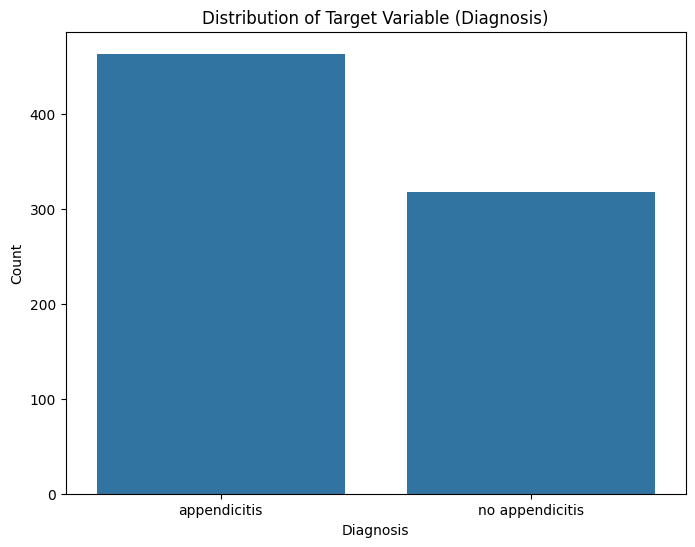

In [64]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Diagnosis', data=targets)
plt.title('Distribution of Target Variable (Diagnosis)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

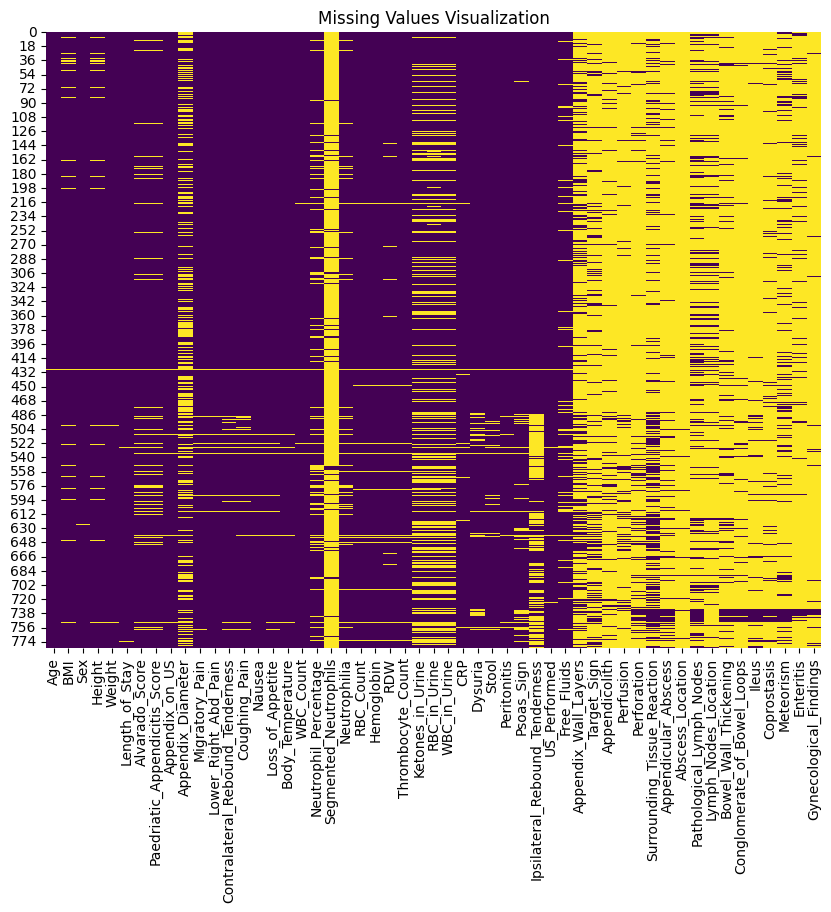

In [65]:
# Plot missing values as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(features.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Visualization')
plt.show()

FEATURE ENGINEERING

In [66]:
# Results storage for confusion matrices, classification reports, and ROC curves
confusion_matrices = []
roc_curves = []
classification_reports = []
accuracy = []

In [67]:
# target
diagnosis = targets[['Diagnosis']].copy()

# Initialize the label encoder to convert 'Diagnosis' to a numeric format
label_encoder = LabelEncoder()

# Encode the 'Diagnosis' column
diagnosis['Diagnosis_encoded'] = label_encoder.fit_transform(diagnosis['Diagnosis'].astype(str))

# Find indexes of rows where 'Diagnosis' is NaN
# nan_indexes = diagnosis['Diagnosis'].isna()

# Remove these rows from 'diagnosis'
diagnosis_cleaned = diagnosis.dropna(subset=['Diagnosis']).copy()

# Filter out corresponding rows from 'features'
features_cleaned = features.loc[diagnosis_cleaned.index].copy()

# Check for empty values in BMI, Height, and Weight columns
missing_bmi = features_cleaned['BMI'].isnull()
missing_height = features_cleaned['Height'].isnull()
missing_weight = features_cleaned['Weight'].isnull()

# Calculate BMI where it is empty
height_in_meters_squared = (features_cleaned['Height'] / 100) ** 2
calculated_bmi = features_cleaned['Weight'] / height_in_meters_squared * 10000

# Replace empty BMI values with calculated BMI
features_cleaned.loc[missing_bmi, 'BMI'] = calculated_bmi[missing_bmi]

# Drop rows where BMI is still empty and either Height or Weight is empty
rows_to_drop_bmi = features_cleaned[missing_bmi & (missing_height | missing_weight)].index
features_cleaned.drop(rows_to_drop_bmi, inplace=True)
diagnosis_cleaned.drop(rows_to_drop_bmi, inplace=True)

# Check for empty values in Sex
missing_sex = features_cleaned['Sex'].isnull()

# Drop rows where Sex is empty
rows_to_drop_sex = features_cleaned[missing_sex].index
features_cleaned.drop(rows_to_drop_sex, inplace=True)
diagnosis_cleaned.drop(rows_to_drop_sex, inplace=True)

# Encode the 'Diagnosis' column and add it as a new column to the DataFrame
diagnosis_cleaned['Diagnosis_encoded'] = label_encoder.fit_transform(diagnosis_cleaned['Diagnosis'])

# Check the transformation and print unique encoded values
print(diagnosis_cleaned[['Diagnosis', 'Diagnosis_encoded']].head())
print(set(diagnosis_cleaned['Diagnosis_encoded']))

         Diagnosis  Diagnosis_encoded
0     appendicitis                  0
1  no appendicitis                  1
2  no appendicitis                  1
3  no appendicitis                  1
4     appendicitis                  0
{0, 1}


In [68]:
# Columns to fill NaN with 'no'
columns_to_fill = ['Appendicular_Abscess', 'Appendicolith', 'Appendix_on_US', 'Conglomerate_of_Bowel_Loops', 'Contralateral_Rebound_Tenderness', 'Coprostasis', 'Coughing_Pain', 'Dysuria',
                  'Enteritis', 'Free_Fluids', 'Ileus', 'Ipsilateral_Rebound_Tenderness', 'Ketones_in_Urine', 'Lower_Right_Abd_Pain', 'Meteorism', 'Migratory_Pain', 'Nausea', 'Neutrophilia', 'Pathological_Lymph_Nodes',
                   'Perfusion', 'Peritonitis', 'Psoas_Sign', 'RBC_in_Urine', 'Stool', 'Surrounding_Tissue_Reaction', 'US_Performed', 'WBC_in_Urine']


# Fill NaN in specified columns with 'no'
features_cleaned[columns_to_fill] = features_cleaned[columns_to_fill].fillna('no')

# Filter out non-numeric columns
non_numeric_cols = features_cleaned.select_dtypes(exclude=['number']).columns

# Print unique non-numeric values for each feature column including NaN
for col in non_numeric_cols:
    print(f"{col} has {features_cleaned[col].nunique(dropna=False)} unique non-numeric values (including NaN):")
    print(features_cleaned[col].value_counts(dropna=False))
    print()

Sex has 2 unique non-numeric values (including NaN):
Sex
male      387
female    367
Name: count, dtype: int64

Appendix_on_US has 2 unique non-numeric values (including NaN):
Appendix_on_US
yes    488
no     266
Name: count, dtype: int64

Migratory_Pain has 2 unique non-numeric values (including NaN):
Migratory_Pain
no     552
yes    202
Name: count, dtype: int64

Lower_Right_Abd_Pain has 2 unique non-numeric values (including NaN):
Lower_Right_Abd_Pain
yes    709
no      45
Name: count, dtype: int64

Contralateral_Rebound_Tenderness has 2 unique non-numeric values (including NaN):
Contralateral_Rebound_Tenderness
no     470
yes    284
Name: count, dtype: int64

Coughing_Pain has 2 unique non-numeric values (including NaN):
Coughing_Pain
no     544
yes    210
Name: count, dtype: int64

Nausea has 2 unique non-numeric values (including NaN):
Nausea
yes    435
no     319
Name: count, dtype: int64

Loss_of_Appetite has 3 unique non-numeric values (including NaN):
Loss_of_Appetite
no     

In [69]:
# Convert categorical variable into dummy/indicator variables (one-hot encoding)
X = pd.get_dummies(features_cleaned)

# Store feature names after one-hot encoding, as they will be needed for interpreting the model's feature importances
feature_names = X.columns.tolist()

# Assign the encoded diagnosis column to y, which serves as the target variable for the model
y = diagnosis_cleaned['Diagnosis_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ensure the same set of columns in both train and test sets
# - 'join=left' ensures all columns in X_train are kept, aligning X_test to it
# - 'axis=1' specifies that the alignment is to be done on columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

IMPUTER

In [70]:
# Create an imputer object that replaces NaN values with the median of the column
imputer = SimpleImputer(strategy='median')

# Standardize the data
scaler = StandardScaler()

RANDOM FOREST

In [71]:
# Create a RandomForestClassifier with a specified number of estimators and a fixed random state for reproducibility
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline that first imputes missing values then trains a model
pipeline = Pipeline(steps=[('imputer', imputer), ('scaler', scaler), ('classifier', rf_model)])

# Fit the model using the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = pipeline.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy.append(accuracy_rf)

# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
confusion_matrices.append(cm_rf)

# Calculate ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
roc_curves.append((fpr_rf, tpr_rf))

# Calculate classification report
cls_report_rf = classification_report(y_test, y_pred_rf)
classification_reports.append(cls_report_rf)

# Print the accuracy and a classification report to see performance details
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", cm_rf)
print("Classification Report:\n", cls_report_rf)

Accuracy: 0.9162995594713657
Confusion Matrix:
 [[116   4]
 [ 15  92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.92       120
           1       0.96      0.86      0.91       107

    accuracy                           0.92       227
   macro avg       0.92      0.91      0.92       227
weighted avg       0.92      0.92      0.92       227



FEATURE IMPORTANCE

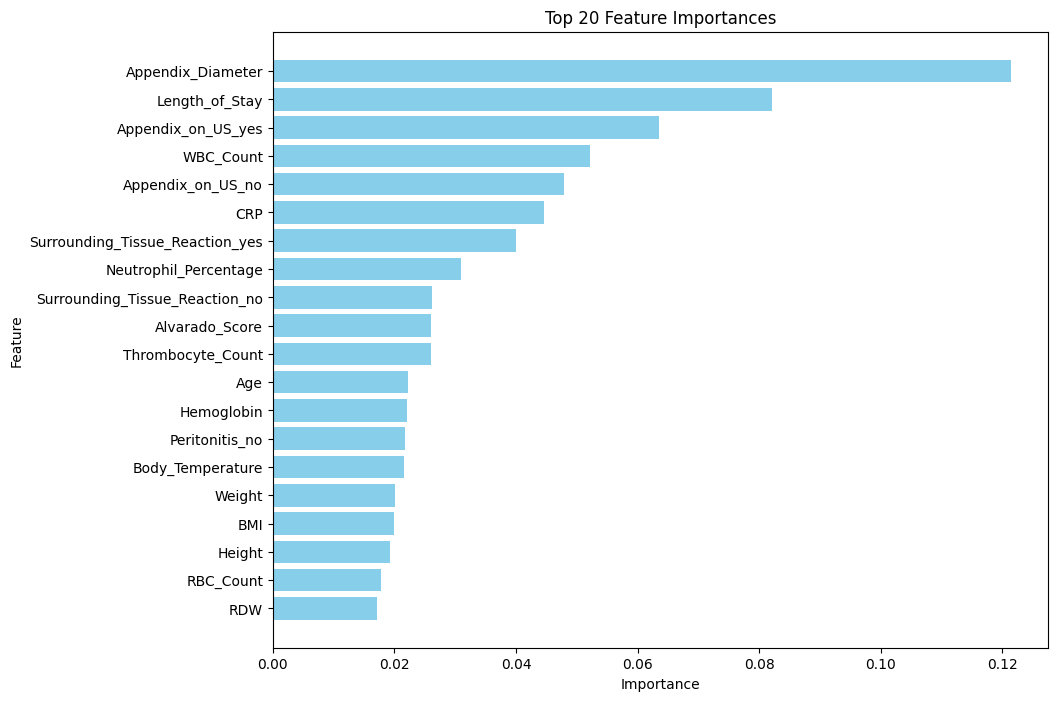

In [72]:
# Get feature importances
importances = rf_model.feature_importances_

# Convert the importances into a DataFrame
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20], color='skyblue')  # top 20 features
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # highest importance at the top
plt.show()


LOGISTIC REGRESSION

In [73]:
# Create a pipeline that first imputes missing values then trains a model
pipeline = Pipeline(steps=[('imputer', imputer), ('scaler', scaler), ('classifier', LogisticRegression(max_iter=1000, random_state=42))])

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = pipeline.predict(X_test)

# Calculate confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
confusion_matrices.append(cm_lr)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy.append(accuracy_lr)

# Calculate ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
roc_curves.append((fpr_lr, tpr_lr))

# Calculate classification report
cls_report_lr = classification_report(y_test, y_pred_lr)
classification_reports.append(cls_report_lr)

# Evaluate the model
print("Accuracy:", accuracy_lr)
print("Confusion Matrix:\n", cm_lr)
print("Classification Report:\n", cls_report_lr)

Accuracy: 0.9074889867841409
Confusion Matrix:
 [[112   8]
 [ 13  94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       120
           1       0.92      0.88      0.90       107

    accuracy                           0.91       227
   macro avg       0.91      0.91      0.91       227
weighted avg       0.91      0.91      0.91       227



Gradient Boosting Classifier static learning rate 0.05

In [74]:
# Set up the Gradient Boosting Classifier with current learning rate
gbs_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, random_state=42)

# Create and fit the pipeline
gbs_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('classifier', gbs_model)
])
gbs_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_gbs = gbs_pipeline.predict(X_test)

# Calculate accuracy
accuracy_gbs = accuracy_score(y_test, y_pred_gbs)
accuracy.append(accuracy_gbs)

# Calculate confusion matrix
conf_matrix_gbs = confusion_matrix(y_test, y_pred_gbs)
confusion_matrices.append(conf_matrix_gbs)

# Calculate ROC curve
fpr_gbs, tpr_gbs, _ = roc_curve(y_test, gbs_pipeline.predict_proba(X_test)[:, 1])
roc_curves.append((fpr_gbs, tpr_gbs))

# Calculate classification report
cls_report_gbs = classification_report(y_test, y_pred_gbs)
classification_reports.append(cls_report_gbs)

# Optionally print results for each model
print(f"Learning Rate: {0.05}")
print(f"Accuracy: {accuracy_gbs}")
print(f"Confusion Matrix:\n{conf_matrix_gbs}")
print(f"Classification Report:\n{cls_report_gbs}\n")

Learning Rate: 0.05
Accuracy: 0.9383259911894273
Confusion Matrix:
[[119   1]
 [ 13  94]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       120
           1       0.99      0.88      0.93       107

    accuracy                           0.94       227
   macro avg       0.95      0.94      0.94       227
weighted avg       0.94      0.94      0.94       227




Gradient Boosting Classifier dynamic learning rate 0.01 to 1 in 0.005 steps

In [75]:
# Define a range of learning rates with 0.1 steps between 0 and 1
learning_rates = np.arange(0.1, 1, 0.05)

# Define the parameter grid using the generated learning rates
param_grid = {'classifier__learning_rate': learning_rates}

# Set up the Gradient Boosting Classifier with fixed number of estimators
gbd_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create the pipeline
gbd_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('classifier', gbd_model)
])

# Initialize GridSearchCV
grid_search = GridSearchCV(gbd_pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to find the best learning rate
grid_search.fit(X_train, y_train)

# Get the best learning rate and its corresponding accuracy
best_learning_rate = grid_search.best_params_['classifier__learning_rate']
best_model = grid_search.best_estimator_
best_accuracy = grid_search.best_score_

# Print the best learning rate and its corresponding accuracy
print("Best Learning Rate:", best_learning_rate)
print("Best Accuracy:", best_accuracy)

# Predict on the test set using the best model
y_pred_gbd = best_model.predict(X_test)

# Calculate confusion matrix for the best model
conf_matrix_best = confusion_matrix(y_test, y_pred_gbd)

# Calculate classification report for the best model
cls_report_best = classification_report(y_test, y_pred_gbd)

# Calculate ROC curve for the best model
fpr_best, tpr_best, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])

# Store the results in the lists
accuracy.append(best_accuracy)
confusion_matrices.append(conf_matrix_best)
classification_reports.append(cls_report_best)
roc_curves.append((fpr_best, tpr_best))

# Print the results for the best model
print("Accuracy:", best_accuracy)
print("Confusion Matrix:\n", conf_matrix_best)
print("Classification Report:\n", cls_report_best)

Best Learning Rate: 0.40000000000000013
Best Accuracy: 0.9354177897574123
Accuracy: 0.9354177897574123
Confusion Matrix:
 [[119   1]
 [ 13  94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       120
           1       0.99      0.88      0.93       107

    accuracy                           0.94       227
   macro avg       0.95      0.94      0.94       227
weighted avg       0.94      0.94      0.94       227



Support Vector Machine

In [76]:
# SVM model with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)

# Create a pipeline that includes scaling, imputation, and the SVM classifier
svm_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),  # SVMs require feature scaling for optimal performance
    ('classifier', svm_model)
])

# Fit the SVM model
svm_pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = svm_pipeline.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)
confusion_matrices.append(cm_svm)

fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_pipeline.decision_function(X_test))
roc_curves.append((fpr_svm, tpr_svm))

# Calculate accuracy and append it to the list
accuracy.append(accuracy_score(y_test, y_pred_svm))

# Calculate classification report and append it to the list
cls_report_svm = classification_report(y_test, y_pred_svm)
classification_reports.append(cls_report_svm)

# Print the accuracy and a classification report to see performance details
print("Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix (SVM):\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report (SVM):\n", classification_report(y_test, y_pred_svm))

Accuracy (SVM): 0.8634361233480177
Confusion Matrix (SVM):
 [[111   9]
 [ 22  85]]
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       120
           1       0.90      0.79      0.85       107

    accuracy                           0.86       227
   macro avg       0.87      0.86      0.86       227
weighted avg       0.87      0.86      0.86       227



Neural Network

In [77]:
# Create a pipeline for preprocessing
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Apply transformations and prepare data
X_train_prepared = pipeline.fit_transform(X_train)
X_test_prepared = pipeline.transform(X_test)

# Build a simple neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_prepared.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define a callback to record training metrics
class MetricsCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        accuracy.append(logs['accuracy'])

# Fit the neural network
history = model.fit(X_train_prepared, y_train, epochs=50, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_prepared, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Retrieve the confusion matrix and ROC curve from the neural network's predictions
y_pred_nn = (model.predict(X_test_prepared) > 0.5).astype("int32")
cm_nn = confusion_matrix(y_test, y_pred_nn)
confusion_matrices.append(cm_nn)

fpr_nn, tpr_nn, _ = roc_curve(y_test, model.predict(X_test_prepared))
roc_curves.append((fpr_nn, tpr_nn))

Epoch 1/50
15/15 [==============================] - 1s 27ms/step - loss: 0.6378 - accuracy: 0.6519 - val_loss: 0.5531 - val_accuracy: 0.7170
Epoch 2/50
15/15 [==============================] - 0s 9ms/step - loss: 0.4270 - accuracy: 0.7932 - val_loss: 0.4539 - val_accuracy: 0.8113
Epoch 3/50
15/15 [==============================] - 0s 8ms/step - loss: 0.3242 - accuracy: 0.8797 - val_loss: 0.4125 - val_accuracy: 0.8491
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.2552 - accuracy: 0.9030 - val_loss: 0.3829 - val_accuracy: 0.8491
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.2088 - accuracy: 0.9241 - val_loss: 0.3619 - val_accuracy: 0.9057
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.1696 - accuracy: 0.9409 - val_loss: 0.3453 - val_accuracy: 0.8868
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: 0.1378 - accuracy: 0.9599 - val_loss: 0.3494 - val_accuracy: 0.8868
Epoch 8/50
15/15 [=

VISUALISE

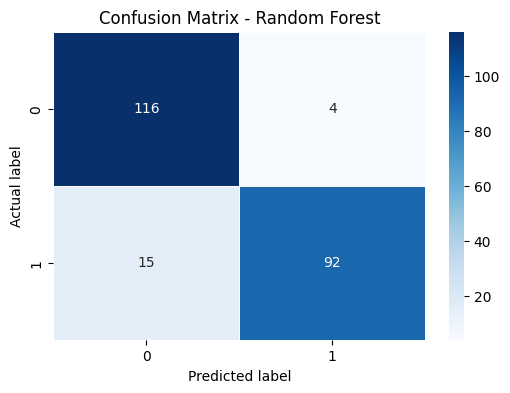

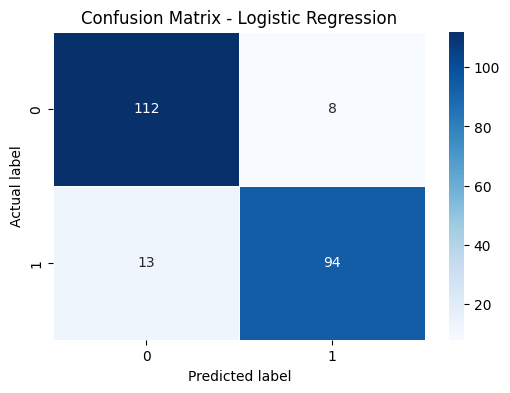

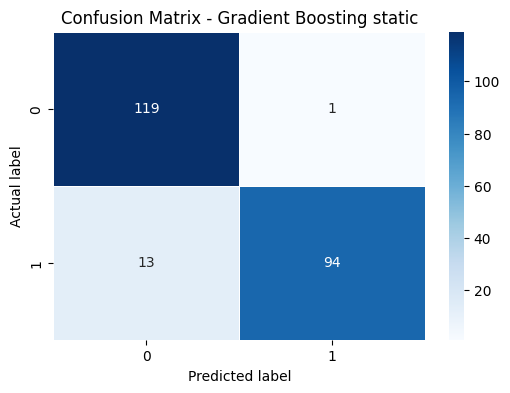

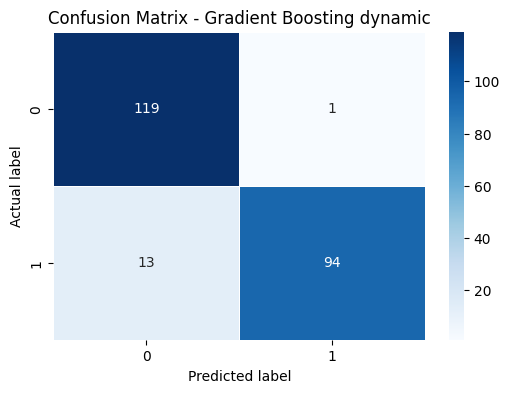

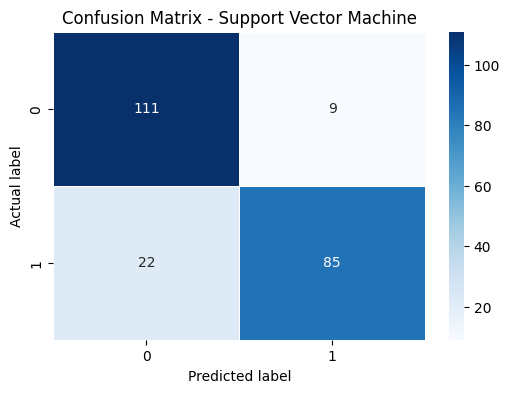

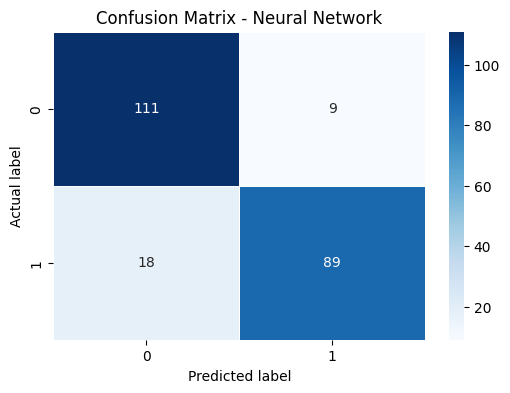

In [78]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap="Blues")
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(title)
    plt.show()

# Plot confusion matrices
model_names = ["Random Forest", "Logistic Regression", "Gradient Boosting static", "Gradient Boosting dynamic", "Support Vector Machine", "Neural Network"]
for idx, (cm, model_name) in enumerate(zip(confusion_matrices, model_names)):
    plot_confusion_matrix(cm, f'Confusion Matrix - {model_name}')

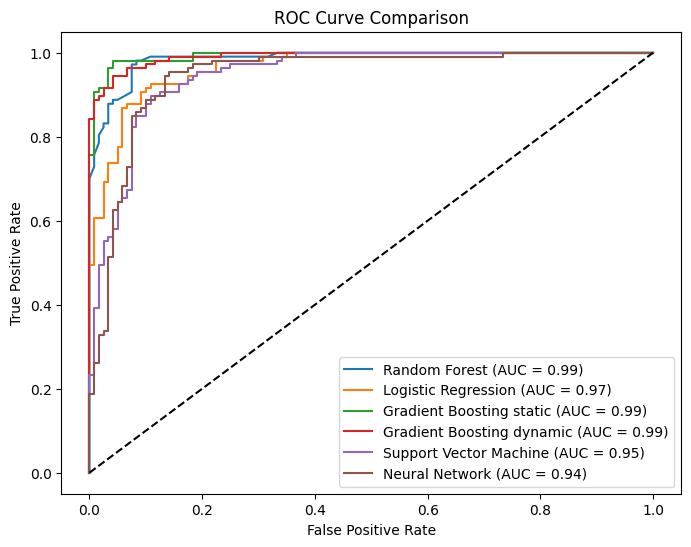

In [79]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
for idx, (curve, model_name) in enumerate(zip(roc_curves, model_names)):
    fpr, tpr = curve
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

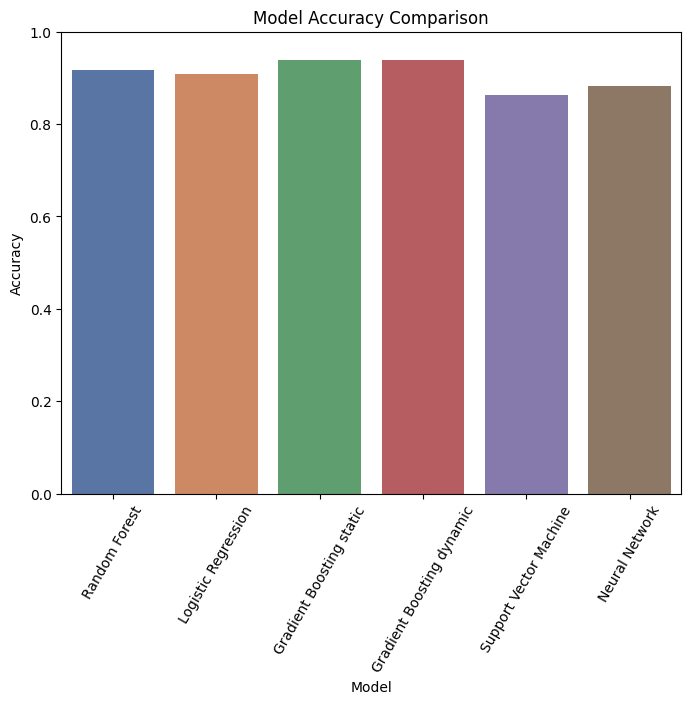

In [83]:
# Collect accuracies for each model
accuracies = [accuracy_score(y_test, y_pred_rf),
              accuracy_score(y_test, y_pred_lr),
              accuracy_score(y_test, y_pred_gbs),
              accuracy_score(y_test, y_pred_gbd),
              accuracy_score(y_test, y_pred_svm),
              accuracy_score(y_test, y_pred_nn)]

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies, hue=model_names, palette='deep', legend=False)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set y-axis limits to show percentages from 0 to 100%
plt.xticks(rotation=60)  # Rotate x-axis labels
plt.legend([], frameon=False)  # Hides the legend
plt.show()

Epoch 1/50
17/17 [==============================] - 2s 22ms/step - loss: 4.9206 - accuracy: 0.5793 - val_loss: 4.3578 - val_accuracy: 0.9344 - lr: 0.0010
Epoch 2/50
17/17 [==============================] - 0s 7ms/step - loss: 4.2711 - accuracy: 0.7841 - val_loss: 3.9089 - val_accuracy: 0.9344 - lr: 0.0010
Epoch 3/50
17/17 [==============================] - 0s 8ms/step - loss: 3.9073 - accuracy: 0.8007 - val_loss: 3.5722 - val_accuracy: 0.9180 - lr: 0.0010
Epoch 4/50
17/17 [==============================] - 0s 8ms/step - loss: 3.5126 - accuracy: 0.8487 - val_loss: 3.2642 - val_accuracy: 0.9016 - lr: 0.0010
Epoch 5/50
17/17 [==============================] - 0s 7ms/step - loss: 3.2130 - accuracy: 0.8561 - val_loss: 3.0033 - val_accuracy: 0.9180 - lr: 0.0010
Epoch 6/50
17/17 [==============================] - 0s 6ms/step - loss: 2.8903 - accuracy: 0.8911 - val_loss: 2.7785 - val_accuracy: 0.9016 - lr: 0.0010
Epoch 7/50
17/17 [==============================] - 0s 7ms/step - loss: 2.6351 - 

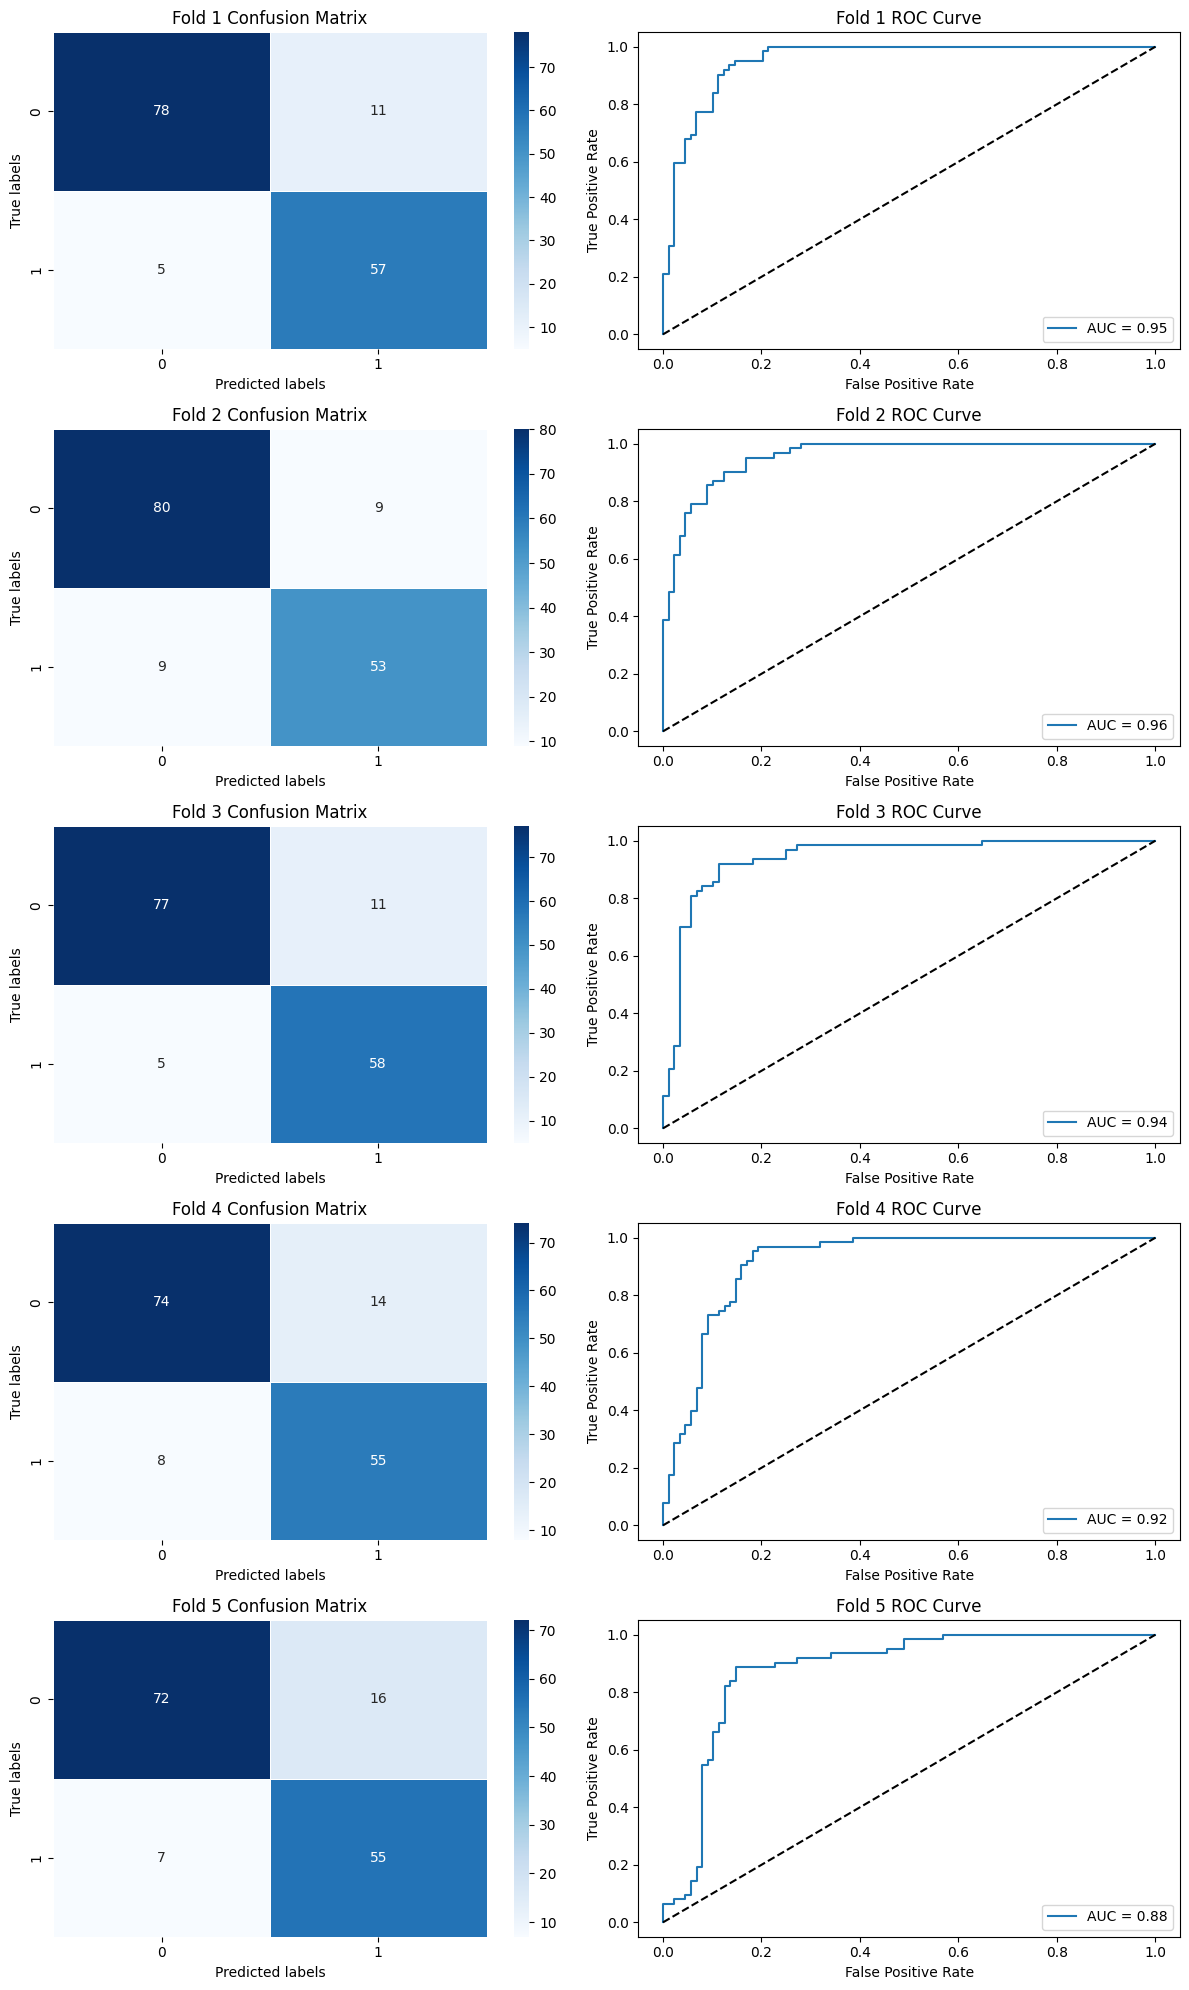

In [81]:
# Data preprocessing
pipeline_nn_k = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Apply transformations to the entire dataset (assuming X and y are your full dataset)
X_prepared_nn_k = pipeline_nn_k.fit_transform(X)

# Define k-fold cross-validation
k = 5
kfold_nn_k = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Model configuration
def build_model_nn_k(input_shape):
    model = Sequential([
        GaussianNoise(0.1, input_shape=(input_shape,)),
        Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        Dropout(0.3),
        BatchNormalization(),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        Dropout(0.3),
        BatchNormalization(),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Callbacks
early_stopping_nn_k = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr_nn_k = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)

# Arrays to store scores
confusion_matrices_nn_k = []
roc_curves_nn_k = []
accuracies_nn_k = []

# K-fold cross-validation loop
for train_index, test_index in kfold_nn_k.split(X_prepared_nn_k, y):
    X_train_nn_k, X_test_nn_k = X_prepared_nn_k[train_index], X_prepared_nn_k[test_index]
    y_train_nn_k, y_test_nn_k = y.iloc[train_index], y.iloc[test_index]

    model_nn_k = build_model_nn_k(X_train_nn_k.shape[1])
    model_nn_k.fit(X_train_nn_k, y_train_nn_k, epochs=50, validation_split=0.1, callbacks=[early_stopping_nn_k, reduce_lr_nn_k])

    _, accuracy_nn_k = model_nn_k.evaluate(X_test_nn_k, y_test_nn_k)
    accuracies_nn_k.append(accuracy_nn_k)

    y_pred_nn_k = (model_nn_k.predict(X_test_nn_k) > 0.5).astype(int)
    cm_nn_k = confusion_matrix(y_test_nn_k, y_pred_nn_k)
    confusion_matrices_nn_k.append(cm_nn_k)

    fpr_nn_k, tpr_nn_k, _nn_k = roc_curve(y_test_nn_k, model_nn_k.predict(X_test_nn_k))
    roc_curves_nn_k.append((fpr_nn_k, tpr_nn_k))

# Average accuracy
print(f'Average Test Accuracy: {np.mean(accuracies_nn_k) * 100:.2f}%')

# Plotting the confusion matrices and ROC curves
fig, axes = plt.subplots(nrows=k, ncols=2, figsize=(12, k * 4))

for i, (cm_nn_k, curve_nn_k) in enumerate(zip(confusion_matrices_nn_k, roc_curves_nn_k)):
    fpr_nn_k, tpr_nn_k = curve_nn_k  # Unpack the correctly named tuple

    # Plot confusion matrix
    sns.heatmap(cm_nn_k, annot=True, fmt="d", linewidths=.5, cmap="Blues", ax=axes[i][0])
    axes[i][0].set_title(f'Fold {i+1} Confusion Matrix')
    axes[i][0].set_xlabel('Predicted labels')
    axes[i][0].set_ylabel('True labels')

    # Plot ROC curve
    auc_score_nn_k = auc(fpr_nn_k, tpr_nn_k)
    axes[i][1].plot(fpr_nn_k, tpr_nn_k, label=f"AUC = {auc_score_nn_k:.2f}")
    axes[i][1].plot([0, 1], [0, 1], 'k--')
    axes[i][1].set_title(f'Fold {i+1} ROC Curve')
    axes[i][1].set_xlabel('False Positive Rate')
    axes[i][1].set_ylabel('True Positive Rate')
    axes[i][1].legend(loc='lower right')

plt.tight_layout()
plt.show()